In [1]:
# libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# run the following command to install the kaggle package
# note: needs pip installed on user's system first to run this command
%pip install kaggle

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import json

# Set the environment variable to point to the "API" folder in the current working directory
os.environ['KAGGLE_CONFIG_DIR'] = os.path.join(os.getcwd(), 'API')

# Verify that the environment variable is set correctly
print("KAGGLE_CONFIG_DIR:", os.environ['KAGGLE_CONFIG_DIR'])

# Check if the kaggle.json file exists in the specified directory
config_path = os.path.join(os.environ['KAGGLE_CONFIG_DIR'], 'kaggle.json')
if not os.path.exists(config_path):
    raise FileNotFoundError(f"Could not find kaggle.json at {config_path}")

# Load the configuration from the kaggle.json file
with open(config_path, 'r') as f:
    config = json.load(f)

print(config)

# Initialize the Kaggle API with the loaded configuration
api = KaggleApi()

# Manually set the configuration parameters
api.config.username = config['username']
api.config.key = config['key']

# Authenticate the Kaggle API
api.authenticate()


# Define the dataset to download
dataset = 'fernandogarciah24/top-1000-imdb-dataset'  # Replace with the actual dataset path from Kaggle

KAGGLE_CONFIG_DIR: h:\Jonathan\CollegeLive\CollegeProgramming\StatProb\fpStatpropb24\API
{'username': 'jozeli', 'key': '99d807daa390aaef8a27a3cf475d4eb2'}


AttributeError: 'str' object has no attribute 'username'

In [ ]:
# Run the folllowing command to download the dataset
api.dataset_download_files(dataset, path='data/', unzip=True)

In [4]:
# Load the dataset into a pandas DataFrame
data = pd.read_csv('data/imdb_top_1000.csv') # Replace with the actual dataset file name
data.head()


KeyboardInterrupt



In [2]:
import os

file_path = r'C:\Users\ARUL\Documents\EDUCATIONAL SHIT\kuliah coy\sem 1\FP STATPROB\imdb_top_1000.csv'
data = pd.read_csv(file_path)

data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ARUL\\Documents\\EDUCATIONAL SHIT\\kuliah coy\\sem 1\\FP STATPROB\\imdb_top_1000.csv'

Ini adalah data yang ditunjukkan oleh pandas dengan beberapa column yang tertera di dalam csv

In [3]:
data.head(), data.columns

(                                         Poster_Link  \
 0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
 1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
 2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
 3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
 4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   
 
                Series_Title Released_Year Certificate  Runtime  \
 0  The Shawshank Redemption          1994           A  142 min   
 1             The Godfather          1972           A  175 min   
 2           The Dark Knight          2008          UA  152 min   
 3    The Godfather: Part II          1974           A  202 min   
 4              12 Angry Men          1957           U   96 min   
 
                   Genre  IMDB_Rating  \
 0                 Drama          9.3   
 1          Crime, Drama          9.2   
 2  Action, Crime, Drama          9.0   
 3          Crime, Drama          9.0   
 4          Crime, Drama          9.0   
 
    

sedangkan ini adalah data yang sudah dipecah dengan baris dan kolumn yang tertera, ini nantinya akan di analisis.
berdasarkan dataset ini, kolom yang tertera antara lain:
1. Poster_Link
2. Series_Title, Relesed_Year, Certificate, Runtime
3. Genre, IMDB_Rating
4. Meta_score
5. Director, Star1 , Star2, Star3, Star4
6. No_of_Votes
7. Gross

In [4]:
#analisis distribusi data (zelig)

Analisis Korelasi,
menggunakan beberapa kolom yang relevan, seperti:
1. IMDB_Rating
2. Meta_score
3. No_of_Votes
4. Gross (pendapatan film)
5. Runtime

sebelum dianalisis, kolom Gross perlu diubah ke dalam format numerik agar dapat dianalisis dan mendapatkan nilai dari setiap kolom runtime.
Berikut adalah data yang sudah diformatkan dan dianaliskan korelasinya:

In [5]:
#analisis korelasi data (irul)
data['Gross'] = data['Gross'].replace(',', '', regex=True).replace('None', None).astype(float)
data['Runtime'] = data['Runtime'].str.extract('(\d+)').astype(float)

numeric_data = data[['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Runtime']]
correlation_matrix = numeric_data.corr()

correlation_matrix

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ARUL\AppData\Local\Temp\ipykernel_22340\4252971347.py:3: SyntaxWarning: invalid escape sequence '\d'
  data['Runtime'] = data['Runtime'].str.extract('(\d+)').astype(float)


,IMDB_Rating,Meta_score,No_of_Votes,Gross,Runtime
IMDB_Rating,1.000000,0.268531,0.494979,0.095923,0.243096
Meta_score,0.268531,1.000000,-0.018507,-0.030587,-0.031452
No_of_Votes,0.494979,-0.018507,1.000000,0.574393,0.173264
Gross,0.095923,-0.030587,0.574393,1.000000,0.139671
Runtime,0.243096,-0.031452,0.173264,0.139671,1.000000


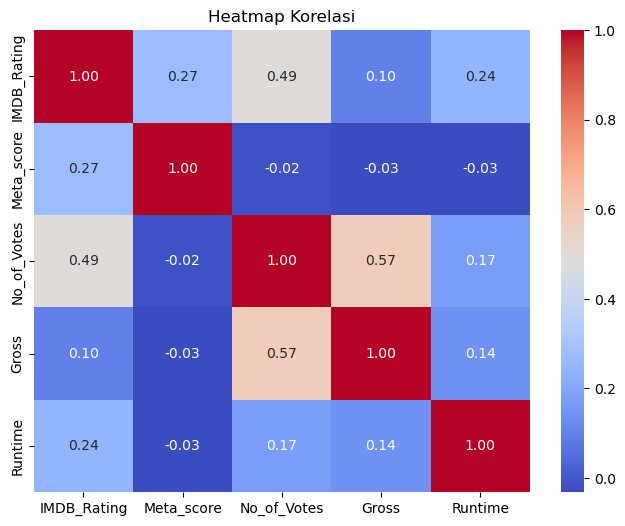

In [35]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()

Dari visual Heatmap Korelasi ini menunjukkan bahwa
1. Korelasi antara No_of_Votes (angka vote) dengan Gross(angka penjualan) menunjukkan hubungan positif sedang.

2. Korelasi antara No_of_Votes (angka vote) dengan IMDB_Rating menunjukkan hubungan positif sedang.

3. Korelasi antara IMDB_Rating dengan 

In [ ]:
#analisis popularitas data (kaisar)